In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_theme(style="whitegrid")

# Load the CLEANED dataset
try:
    df = pd.read_csv('../data/processed/asteroids_cleaned.csv')
except FileNotFoundError:
    print("ERROR: 'asteroids_cleaned.csv' not found.")
    print("Please run the '01_Data_Acquisition_and_Cleaning.ipynb' notebook first.")

print("Data loaded successfully:")
print(df.info())

Data loaded successfully:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39719 entries, 0 to 39718
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pha     39719 non-null  int64  
 1   H       39719 non-null  float64
 2   e       39719 non-null  float64
 3   a       39719 non-null  float64
 4   q       39719 non-null  float64
 5   i       39719 non-null  float64
 6   moid    39719 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.1 MB
None


Target variable balance:
pha
0    37205
1     2514
Name: count, dtype: int64

[Plot saved to results/figures/01_class_distribution.png]


C:\Users\libra\AppData\Local\Temp\ipykernel_19392\758088489.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-PHA', 'PHA'])


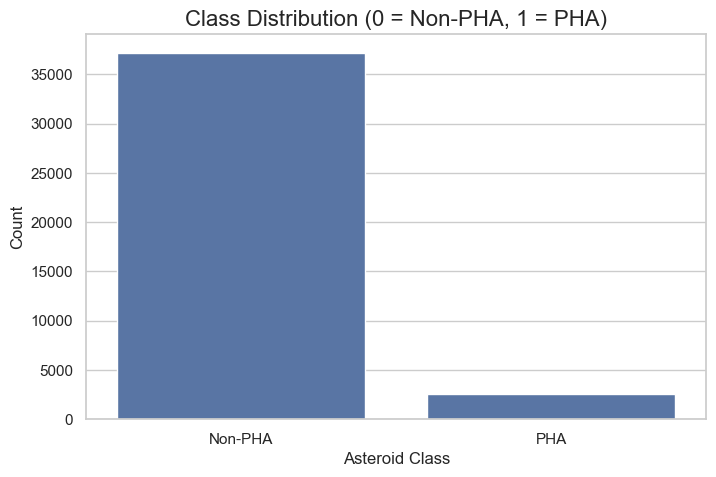

In [2]:
print("Target variable balance:")
print(df['pha'].value_counts())

# Plot the balance
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='pha', data=df)
ax.set_title('Class Distribution (0 = Non-PHA, 1 = PHA)', fontsize=16)
ax.set_xticklabels(['Non-PHA', 'PHA'])
plt.xlabel('Asteroid Class')
plt.ylabel('Count')

# Save the figure
plt.savefig('../results/figures/01_class_distribution.png')
print("\n[Plot saved to results/figures/01_class_distribution.png]")

Analyzing key feature distributions...
[Plot saved to results/figures/02_h_moid_distributions.png]


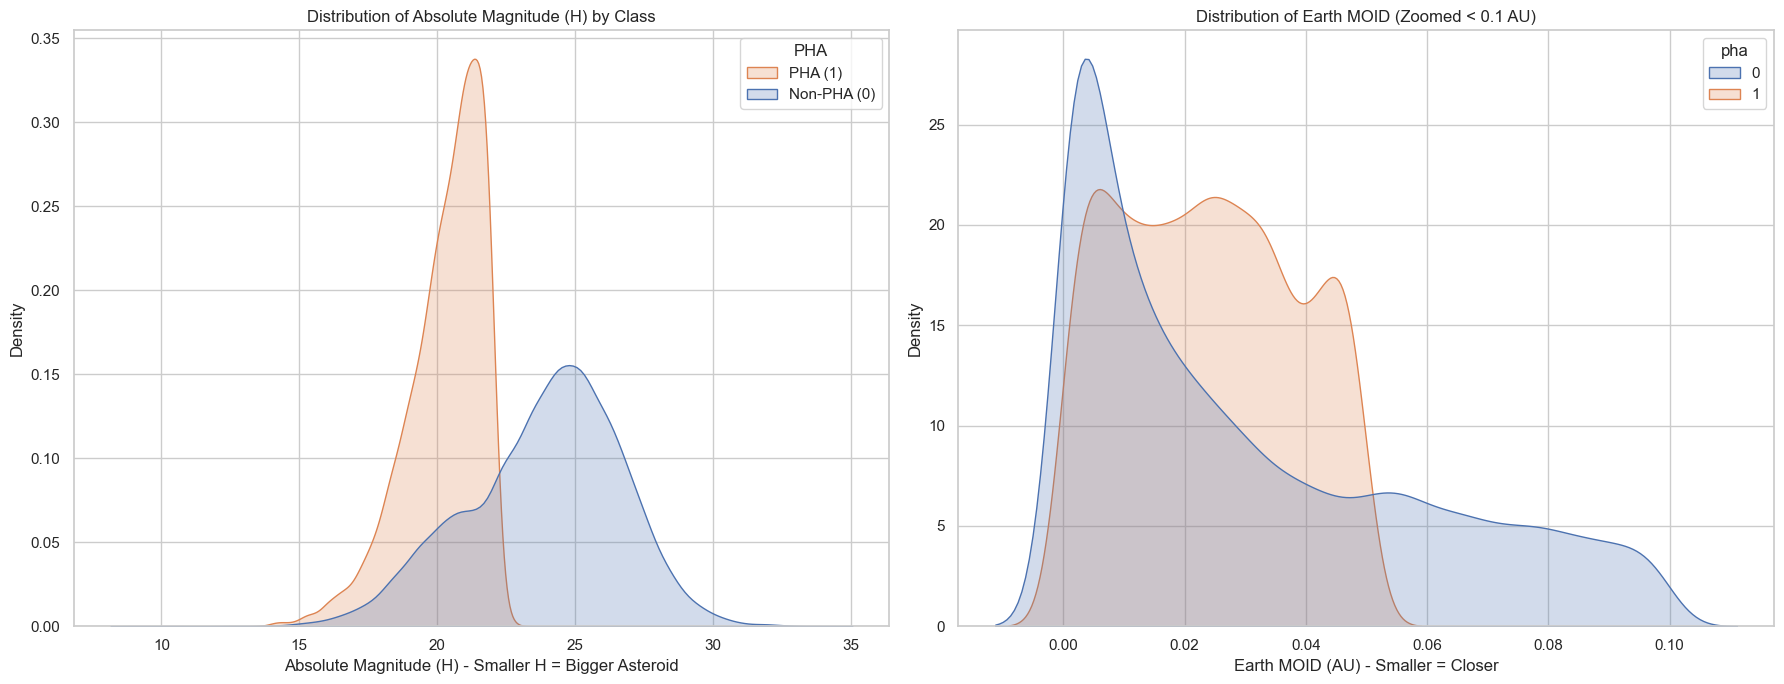

In [3]:
print("Analyzing key feature distributions...")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Absolute Magnitude (H)
# using Kdeplot (Kernel Density) to see the distributions smoothly
sns.kdeplot(data=df, x='H', hue='pha', fill=True,
            common_norm=False, ax=ax1, legend=False)
ax1.set_title('Distribution of Absolute Magnitude (H) by Class')
ax1.set_xlabel('Absolute Magnitude (H) - Smaller H = Bigger Asteroid')
ax1.set_ylabel('Density')
ax1.legend(title='PHA', labels=['PHA (1)', 'Non-PHA (0)'])

# Plot 2: Earth MOID (log scale is often needed)
#Zooming on critical area (< 0.1 AU)
sns.kdeplot(data=df[df['moid'] < 0.1], x='moid', hue='pha', fill=True,
            common_norm=False, ax=ax2)
ax2.set_title('Distribution of Earth MOID (Zoomed < 0.1 AU)')
ax2.set_xlabel('Earth MOID (AU) - Smaller = Closer')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.savefig('../results/figures/02_h_moid_distributions.png')
print("[Plot saved to results/figures/02_h_moid_distributions.png]")

Calculating correlation matrix...
[Plot saved to results/figures/03_correlation_heatmap.png]


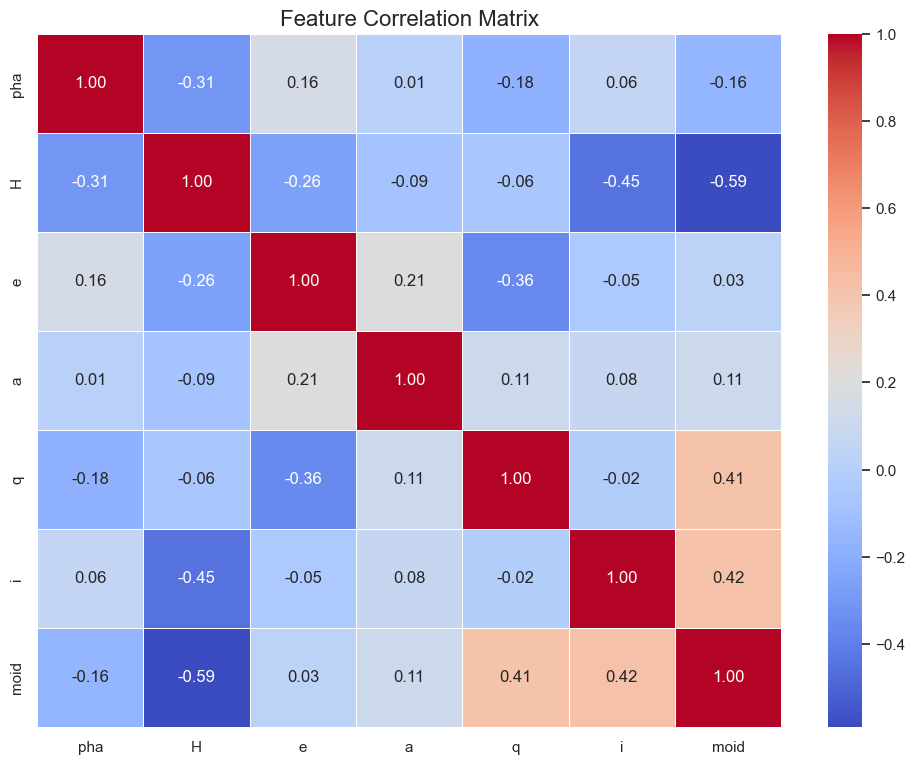

In [4]:
print("Calculating correlation matrix...")

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=.5)
plt.title('Feature Correlation Matrix', fontsize=16)

plt.savefig('../results/figures/03_correlation_heatmap.png')
print("[Plot saved to results/figures/03_correlation_heatmap.png]")